In [1]:
import os
#import jovian
import matplotlib
import opendatasets as od
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [2]:
merged_df = pd.read_csv('merged_data_2.csv')

In [3]:
#submission_df = pd.read_csv('sample submission 1.csv)

In [4]:
#submission_df.nunique()

In [5]:
merged_df['PURCHASE_DATE'] = pd.to_datetime(merged_df['PURCHASE_DATE'])
#merged_df['LAST_PURCHASE_DATE'] = pd.to_datetime(merged_df['LAST_PURCHASE_DATE'])# Assuming df is your DataFrame and cols_to_drop is a list of column names to drop



In [6]:
(merged_df.columns)

Index(['MAGIC_KEY', 'PURCHASE_COUNT_x', 'PURCHASE_COUNT_y',
       'TOTAL_AMOUNT_SPENT', 'BOX_ID', 'QUALITY', 'DELIVERY_OPTION', 'MILK',
       'MEAT', 'UNIT_PRICE', 'PURCHASE_DATE', 'BOX_COUNT', 'PURCHASE',
       'TOTAL_AMOUNT', 'DAY_SINCE_LAST_PURCHASE', 'TIME_DIFF', 'AVERAGE_DIFF',
       '10_FIRST_PURCHASE_2018', '10_LAST_PURCHASE_2018',
       '11_FIRST_PURCHASE_2018', '11_LAST_PURCHASE_2018',
       '12_FIRST_PURCHASE_2018', '12_LAST_PURCHASE_2018',
       '01_FIRST_PURCHASE_2019', '01_LAST_PURCHASE_2019',
       '02_FIRST_PURCHASE_2019', '02_LAST_PURCHASE_2019', 'TOTAL_MEAT_x',
       'MEAT_PURCHASE_FREEQUENCY', 'TOTAL_MEAT_y', 'MILK_PURCHASE_FREEQUENCY',
       'DAY', 'MONTH', 'YEAR', 'OCT_MEAT', 'NOV_MEAT', 'DEC_MEAT', 'JAN_MEAT',
       'FEB_MEAT', 'OCT_MILK', 'NOV_MILK', 'DEC_MILK', 'JAN_MILK', 'FEB_MILK'],
      dtype='object')

### Encoding Categorical Data

In [7]:
from sklearn.preprocessing import LabelEncoder
import pickle

In [8]:
le = LabelEncoder() #creating an instance of LabelEncoder
merged_df['MAGIC_KEY_ENCODED'] = le.fit_transform(merged_df['MAGIC_KEY'])
merged_df['DELIVERY_ENCODED'] = le.fit_transform(merged_df['DELIVERY_OPTION'])
merged_df['QUALITY_ENCODED'] = le.fit_transform(merged_df['QUALITY'])

In [9]:
prb_df_without_encode = pd.read_csv('problem 1.csv')
prb_df_encode = prb_df_without_encode.copy()

In [10]:
prb_df_encode = prb_df_encode.merge(merged_df, on='MAGIC_KEY', how='left').drop_duplicates(subset=['MAGIC_KEY'])


In [11]:
#prb_df_encode.MAGIC_KEY.value_counts()

In [12]:
#prb_df_encode

## Added magic key encode in the submission df

In [13]:
prb_df_encode['MAGIC_KEY_ENCODED'] = le.fit_transform(prb_df_encode['MAGIC_KEY'])


In [14]:
### drop purchase date and last purchase date column
#prb_df_encode = prb_df_encode.drop(columns=['MAGIC_KEY'])

In [15]:
prb_df_encode.duplicated().sum()

0

In [16]:
#prb_df_encode.info()

In [17]:
merged_df['MAGIC_KEY_ENCODED'] = le.fit_transform(merged_df['MAGIC_KEY'])


## col drop

In [18]:
# Assuming df is your DataFrame and cols_to_drop is a list of column names to drop
cols_to_drop = [ 'TOTAL_MEAT_x','MEAT_PURCHASE_FREEQUENCY', 'TOTAL_MEAT_y', 'MILK_PURCHASE_FREEQUENCY','NOV_MEAT', '02_LAST_PURCHASE_2019', 'PURCHASE_COUNT_x','DELIVERY_ENCODED', 'JAN_MILK', 'NOV_MILK', 'OCT_MILK', 'AVERAGE_DIFF', 'BOX_ID',  'TOTAL_AMOUNT_SPENT', 'UNIT_PRICE' , 'BOX_COUNT']

# Drop the specified columns
merged_df.drop(columns=cols_to_drop, inplace=True)


## splitting dataset for training and val set

In [19]:
len(merged_df)

2455770

In [20]:
train_size = int(.75 * len(merged_df))
train_size

1841827

In [21]:
sorted_df = merged_df.sort_values('PURCHASE_DATE')
train_df, val_df = sorted_df[:train_size], sorted_df[train_size:]

In [22]:
len(train_df), len(val_df)

(1841827, 613943)

In [23]:
val_df.PURCHASE_DATE.min(), val_df.PURCHASE_DATE.max()

(Timestamp('2019-01-30 00:00:00'), Timestamp('2019-02-28 00:00:00'))

In [24]:
train_df.head()

,MAGIC_KEY,PURCHASE_COUNT_y,QUALITY,DELIVERY_OPTION,MILK,MEAT,PURCHASE_DATE,PURCHASE,TOTAL_AMOUNT,DAY_SINCE_LAST_PURCHASE,...,MONTH,YEAR,OCT_MEAT,DEC_MEAT,JAN_MEAT,FEB_MEAT,DEC_MILK,FEB_MILK,MAGIC_KEY_ENCODED,QUALITY_ENCODED
488688,293E499036D,1,Standard,Delivery from Collection Point,10.0,1.8,2018-10-01,Y,17.98,28,...,10,2018,0.0,1.8,0.0,0.0,10.0,0.0,245753,1
760624,2BCB515E04F,1,Premium,Delivery from Collection Point,8.0,1.3,2018-10-01,Y,15.98,61,...,10,2018,0.0,1.3,0.0,0.0,8.0,0.0,370592,0
2117599,2CC2B3004ED,4,Premium,Delivery from Collection Point,9.0,1.8,2018-10-01,Y,19.98,0,...,10,2018,2.2,1.8,2.2,0.0,9.0,0.0,1084551,0
603270,297C90567DC,11,Standard,Delivery from Collection Point,10.0,0.2,2018-10-01,Y,12.18,92,...,10,2018,0.0,2.0,1.8,3.6,20.0,34.7,298784,1
2007018,2CAFC959E80,1,Premium,Home Delivery - CoD,8.0,1.3,2018-10-01,Y,15.98,0,...,10,2018,0.0,1.3,0.0,0.0,8.0,0.0,1024986,0


# train, test, val split

In [25]:
#train_df.info()

In [26]:
### drop purchase date and last purchase date column
train_df = train_df.drop(columns=['PURCHASE_DATE', 'MAGIC_KEY', 'QUALITY', 'DELIVERY_OPTION', 'TIME_DIFF'  ])
val_df = val_df.drop(columns=['PURCHASE_DATE', 'MAGIC_KEY', 'QUALITY', 'DELIVERY_OPTION', 'TIME_DIFF'])
test_df = prb_df_encode.drop(columns=['PURCHASE_DATE', 'MAGIC_KEY', 'QUALITY', 'DELIVERY_OPTION', 'TIME_DIFF'])

In [27]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1841827 entries, 488688 to 666305
Data columns (total 26 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   PURCHASE_COUNT_y         int64  
 1   MILK                     float64
 2   MEAT                     float64
 3   PURCHASE                 object 
 4   TOTAL_AMOUNT             float64
 5   DAY_SINCE_LAST_PURCHASE  int64  
 6   10_FIRST_PURCHASE_2018   int64  
 7   10_LAST_PURCHASE_2018    int64  
 8   11_FIRST_PURCHASE_2018   int64  
 9   11_LAST_PURCHASE_2018    int64  
 10  12_FIRST_PURCHASE_2018   int64  
 11  12_LAST_PURCHASE_2018    int64  
 12  01_FIRST_PURCHASE_2019   int64  
 13  01_LAST_PURCHASE_2019    int64  
 14  02_FIRST_PURCHASE_2019   int64  
 15  DAY                      int64  
 16  MONTH                    int64  
 17  YEAR                     int64  
 18  OCT_MEAT                 float64
 19  DEC_MEAT                 float64
 20  JAN_MEAT                 float64
 21  FEB_MEAT 

In [28]:
train_df.shape, val_df.shape, test_df.shape

((1841827, 26), (613943, 26), (58689, 42))

In [29]:
train_df.columns

Index(['PURCHASE_COUNT_y', 'MILK', 'MEAT', 'PURCHASE', 'TOTAL_AMOUNT',
       'DAY_SINCE_LAST_PURCHASE', '10_FIRST_PURCHASE_2018',
       '10_LAST_PURCHASE_2018', '11_FIRST_PURCHASE_2018',
       '11_LAST_PURCHASE_2018', '12_FIRST_PURCHASE_2018',
       '12_LAST_PURCHASE_2018', '01_FIRST_PURCHASE_2019',
       '01_LAST_PURCHASE_2019', '02_FIRST_PURCHASE_2019', 'DAY', 'MONTH',
       'YEAR', 'OCT_MEAT', 'DEC_MEAT', 'JAN_MEAT', 'FEB_MEAT', 'DEC_MILK',
       'FEB_MILK', 'MAGIC_KEY_ENCODED', 'QUALITY_ENCODED'],
      dtype='object')

### declaring input and target cols for train, val, test set

In [30]:
input_cols = [col for col in train_df.columns if col != 'PURCHASE']

print(input_cols)


['PURCHASE_COUNT_y', 'MILK', 'MEAT', 'TOTAL_AMOUNT', 'DAY_SINCE_LAST_PURCHASE', '10_FIRST_PURCHASE_2018', '10_LAST_PURCHASE_2018', '11_FIRST_PURCHASE_2018', '11_LAST_PURCHASE_2018', '12_FIRST_PURCHASE_2018', '12_LAST_PURCHASE_2018', '01_FIRST_PURCHASE_2019', '01_LAST_PURCHASE_2019', '02_FIRST_PURCHASE_2019', 'DAY', 'MONTH', 'YEAR', 'OCT_MEAT', 'DEC_MEAT', 'JAN_MEAT', 'FEB_MEAT', 'DEC_MILK', 'FEB_MILK', 'MAGIC_KEY_ENCODED', 'QUALITY_ENCODED']


In [31]:

target_col = 'PURCHASE'

In [32]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [33]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [34]:
test_inputs = test_df[input_cols].copy()
# Test data does not have targets

### Imputing missing numeric values

In [35]:
from sklearn.impute import SimpleImputer

In [36]:
imputer = SimpleImputer(strategy = 'mean').fit(merged_df[input_cols])

In [37]:
train_inputs[input_cols] = imputer.transform(train_inputs[input_cols])
val_inputs[input_cols] = imputer.transform(val_inputs[input_cols])
test_inputs[input_cols] = imputer.transform(test_inputs[input_cols])

### checking the null values

In [38]:
test_inputs[input_cols].isna().sum()

PURCHASE_COUNT_y           0
MILK                       0
MEAT                       0
TOTAL_AMOUNT               0
DAY_SINCE_LAST_PURCHASE    0
10_FIRST_PURCHASE_2018     0
10_LAST_PURCHASE_2018      0
11_FIRST_PURCHASE_2018     0
11_LAST_PURCHASE_2018      0
12_FIRST_PURCHASE_2018     0
12_LAST_PURCHASE_2018      0
01_FIRST_PURCHASE_2019     0
01_LAST_PURCHASE_2019      0
02_FIRST_PURCHASE_2019     0
DAY                        0
MONTH                      0
YEAR                       0
OCT_MEAT                   0
DEC_MEAT                   0
JAN_MEAT                   0
FEB_MEAT                   0
DEC_MILK                   0
FEB_MILK                   0
MAGIC_KEY_ENCODED          0
QUALITY_ENCODED            0
dtype: int64

# Scaling Numeric Features

In [39]:
#from sklearn.preprocessing import MinMaxScaler

In [40]:
#scaler = MinMaxScaler().fit(merged_df[input_cols])

In [41]:
# train_inputs[input_cols] = scaler.transform(train_inputs[input_cols])
# val_inputs[input_cols] = scaler.transform(val_inputs[input_cols])
# test_inputs[input_cols] = scaler.transform(test_inputs[input_cols])

In [42]:
#val_inputs.describe().loc[['min', 'max']]

In [43]:
#test_inputs.head()

## X_train, X_val, X_test

In [44]:
X_train = train_inputs
X_val = val_inputs
X_test = test_inputs

In [45]:
X_train.head()

,PURCHASE_COUNT_y,MILK,MEAT,TOTAL_AMOUNT,DAY_SINCE_LAST_PURCHASE,10_FIRST_PURCHASE_2018,10_LAST_PURCHASE_2018,11_FIRST_PURCHASE_2018,11_LAST_PURCHASE_2018,12_FIRST_PURCHASE_2018,...,MONTH,YEAR,OCT_MEAT,DEC_MEAT,JAN_MEAT,FEB_MEAT,DEC_MILK,FEB_MILK,MAGIC_KEY_ENCODED,QUALITY_ENCODED
488688,1.0,10.0,1.8,17.98,28.0,1.0,0.0,0.0,0.0,0.0,...,10.0,2018.0,0.0,1.8,0.0,0.0,10.0,0.0,245753.0,1.0
760624,1.0,8.0,1.3,15.98,61.0,1.0,0.0,0.0,0.0,0.0,...,10.0,2018.0,0.0,1.3,0.0,0.0,8.0,0.0,370592.0,0.0
2117599,4.0,9.0,1.8,19.98,0.0,1.0,0.0,1.0,1.0,1.0,...,10.0,2018.0,2.2,1.8,2.2,0.0,9.0,0.0,1084551.0,0.0
603270,11.0,10.0,0.2,12.18,92.0,1.0,0.0,1.0,1.0,1.0,...,10.0,2018.0,0.0,2.0,1.8,3.6,20.0,34.7,298784.0,1.0
2007018,1.0,8.0,1.3,15.98,0.0,1.0,0.0,0.0,0.0,0.0,...,10.0,2018.0,0.0,1.3,0.0,0.0,8.0,0.0,1024986.0,0.0


## model training

### Training

We can use `DecisionTreeClassifier` from `sklearn.tree` to train a decision tree.

In [46]:
# from sklearn.tree import DecisionTreeClassifier

In [47]:
# model = DecisionTreeClassifier(random_state=42, max_depth=20)

In [48]:
# %%time
# model.fit(X_train, train_targets)

In [49]:
# model.score(X_train, train_targets)

In [50]:
# model.score(X_val, val_targets)

In [51]:
# model.tree_.max_depth

In [52]:
# model.feature_importances_

In [53]:
# importance_df = pd.DataFrame({
#     'feature': X_train.columns,
#     'importance': model.feature_importances_
# }).sort_values('importance', ascending=False)

In [54]:
# importance_df.head(10)

In [55]:
# def max_depth_error(md):
#     model = DecisionTreeClassifier(max_depth=md, random_state=42)
#     model.fit(X_train, train_targets)
#     train_acc = 1 - model.score(X_train, train_targets)
#     val_acc = 1 - model.score(X_val, val_targets)
#     return {'Max Depth': md, 'Training Error': train_acc, 'Validation Error': val_acc}

In [56]:
# %%time
# errors_df = pd.DataFrame([max_depth_error(md) for md in range(1, 21)])

In [57]:
#errors_df

## Training a Random Forest

While tuning the hyperparameters of a single decision tree may lead to some improvements, a much more effective strategy is to combine the results of several decision trees trained with slightly different parameters. This is called a random forest model. 

The key idea here is that each decision tree in the forest will make different kinds of errors, and upon averaging, many of their errors will cancel out. This idea is also commonly known as the "wisdom of the crowd":

<img src="https://i.imgur.com/4Dg0XK4.png" width="480">

In [58]:
from sklearn.ensemble import RandomForestClassifier

In [59]:
rf = RandomForestClassifier(n_jobs=-1, random_state=42, n_estimators=50, max_leaf_nodes=2**20, max_features= 25) #  min_impurity_decrease=1e-7,

In [60]:
%%time
rf.fit(X_train, train_targets)

CPU times: total: 3min 39s
Wall time: 23.2 s


RandomForestClassifier(max_features=25, max_leaf_nodes=1048576, n_estimators=50,
                       n_jobs=-1, random_state=42)

In [61]:
rf.score(X_train, train_targets), rf.score(X_val, val_targets)

(1.0, 1.0)

In [62]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

In [63]:
importance_df

,feature,importance
14,DAY,1.0
0,PURCHASE_COUNT_y,0.0
13,02_FIRST_PURCHASE_2019,0.0
23,MAGIC_KEY_ENCODED,0.0
22,FEB_MILK,0.0
21,DEC_MILK,0.0
20,FEB_MEAT,0.0
19,JAN_MEAT,0.0
18,DEC_MEAT,0.0
17,OCT_MEAT,0.0


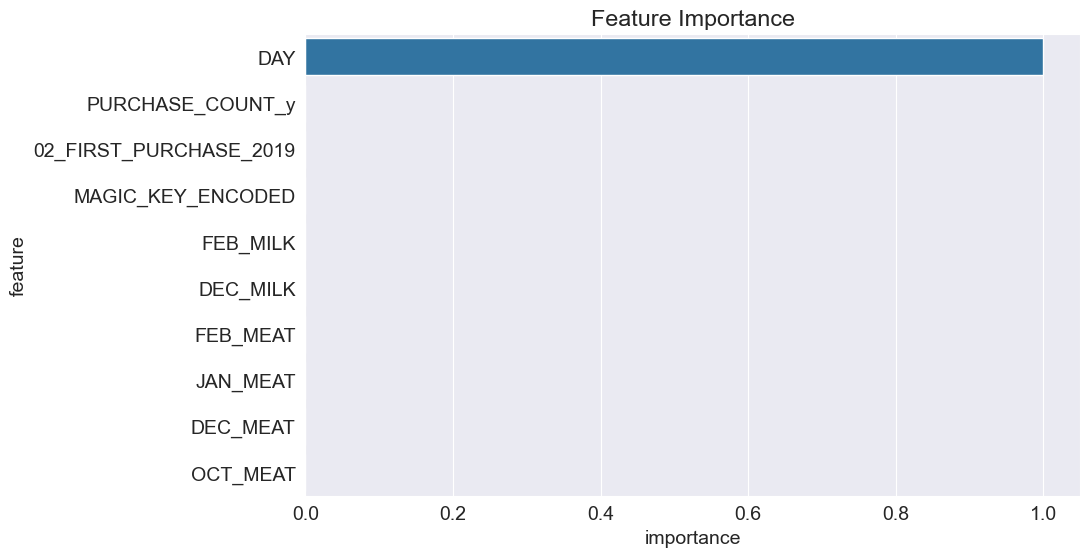

In [64]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

### Evaluation

Let's evaluate the decision tree using the accuracy score.

In [65]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [66]:
train_preds = rf.predict(X_train)

In [67]:
train_preds

array(['Y', 'Y', 'Y', ..., 'N', 'N', 'N'], dtype=object)

In [68]:
pd.value_counts(train_preds)

C:\Users\USER\AppData\Local\Temp\ipykernel_18424\1258350197.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  pd.value_counts(train_preds)


Y    943364
N    898463
Name: count, dtype: int64

In [69]:
train_probs = rf.predict_proba(X_train)

In [70]:
train_probs

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [71]:
accuracy_score(train_targets, train_preds)

1.0

In [72]:
val_targets.value_counts() / len(val_targets)

PURCHASE
N    0.516151
Y    0.483849
Name: count, dtype: float64

### Making a submission on Kaggle

If you're participating in a Kaggle competition, you can generate a submission CSV file and make a submission to check your score on the test set.

In [73]:
test_preds = rf.predict(X_test)
test_preds

array(['N', 'Y', 'N', ..., 'Y', 'Y', 'Y'], dtype=object)

In [74]:
test_df['PURCHASE_PREDICTION'] = test_preds

In [75]:
#test_df.info()

In [76]:
test_df.head()

,PURCHASE_COUNT_x,PURCHASE_COUNT_y,TOTAL_AMOUNT_SPENT,BOX_ID,MILK,MEAT,UNIT_PRICE,BOX_COUNT,PURCHASE,TOTAL_AMOUNT,...,FEB_MEAT,OCT_MILK,NOV_MILK,DEC_MILK,JAN_MILK,FEB_MILK,MAGIC_KEY_ENCODED,DELIVERY_ENCODED,QUALITY_ENCODED,PURCHASE_PREDICTION
0,3,3,45.88,248,0.0,2.9,13.96,1.0,N,13.96,...,3.6,0.0,0.0,0.0,0.0,0.0,4878,0,1,N
3,4,4,72.12,233,10.0,0.0,12.18,1.0,Y,12.18,...,1.8,16.0,16.0,10.0,0.0,16.0,52638,0,1,Y
7,2,2,31.92,255,0.0,3.6,15.96,1.0,N,15.96,...,0.0,0.0,0.0,0.0,0.0,0.0,55221,0,1,N
9,2,2,35.96,258,8.0,2.2,17.98,1.0,Y,17.98,...,2.2,8.0,0.0,0.0,0.0,8.0,54387,0,1,Y
11,4,4,63.84,255,0.0,3.6,15.96,1.0,N,15.96,...,3.6,0.0,0.0,0.0,0.0,0.0,15351,0,1,N


In [77]:
sub_df = pd.merge( prb_df_encode, test_df, on='MAGIC_KEY_ENCODED')


In [78]:
sub_df.head()

,MAGIC_KEY,PURCHASE_COUNT_x_x,PURCHASE_COUNT_y_x,TOTAL_AMOUNT_SPENT_x,BOX_ID_x,QUALITY,DELIVERY_OPTION,MILK_x,MEAT_x,UNIT_PRICE_x,...,JAN_MEAT_y,FEB_MEAT_y,OCT_MILK_y,NOV_MILK_y,DEC_MILK_y,JAN_MILK_y,FEB_MILK_y,DELIVERY_ENCODED_y,QUALITY_ENCODED_y,PURCHASE_PREDICTION
0,28D5BB06356,3,3,45.88,248,Standard,Delivery from Collection Point,0.0,2.9,13.96,...,0.0,3.6,0.0,0.0,0.0,0.0,0.0,0,1,N
1,293BEAB4E98,4,4,72.12,233,Standard,Delivery from Collection Point,10.0,0.0,12.18,...,0.0,1.8,16.0,16.0,10.0,0.0,16.0,0,1,Y
2,2962EE8065C,2,2,31.92,255,Standard,Delivery from Collection Point,0.0,3.6,15.96,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,N
3,2957BE29EA9,2,2,35.96,258,Standard,Delivery from Collection Point,8.0,2.2,17.98,...,0.0,2.2,8.0,0.0,0.0,0.0,8.0,0,1,Y
4,28E351A0745,4,4,63.84,255,Standard,Delivery from Collection Point,0.0,3.6,15.96,...,3.6,3.6,0.0,0.0,0.0,0.0,0.0,0,1,N


In [79]:
sub_df = sub_df[['MAGIC_KEY', 'PURCHASE_PREDICTION']]


In [80]:
sub_df = sub_df.rename(columns={'PURCHASE_PREDICTION': 'PURCHASE'})


In [81]:
sub_df.to_csv('Submission3.csv', index=None)

In [82]:
sub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58689 entries, 0 to 58688
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   MAGIC_KEY  58689 non-null  object
 1   PURCHASE   58689 non-null  object
dtypes: object(2)
memory usage: 917.1+ KB
